In [103]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df1 = pd.read_csv("tags.csv")
df2= pd.read_csv("movies.csv")
df3=pd.read_csv("ratings.csv")

In [105]:
df1.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [106]:
df1.shape

(3683, 4)

In [107]:
df1.tag.unique()

array(['funny', 'Highly quotable', 'will ferrell', ..., 'gun fu',
       'heroic bloodshed', 'Heroic Bloodshed'], dtype=object)

In [108]:
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [109]:
df3.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [110]:
#Joining df2 and df3 based on movieid as the common column

df4 = pd.merge(df3,df2, how= "inner", on = "movieId")
df4.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [111]:
df4.shape

(100836, 6)

In [112]:
#joining df4 and df1 based on UserId as the common column
df = pd.merge(df4,df1, how= "inner", on = ["userId","movieId"])

In [113]:
df = df.drop(["timestamp_x","timestamp_y"],axis=1)
df.head()

,userId,movieId,rating,title,genres,tag
0,336,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,474,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,567,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,289,3,2.5,Grumpier Old Men (1995),Comedy|Romance,moldy
4,289,3,2.5,Grumpier Old Men (1995),Comedy|Romance,old


In [114]:
df.shape

(3476, 6)

**df4 dataframe has all the required columns for recommendations analysis and has 100836 rows, however df dataframe has only 3476, this may be because all users have not given tag to the movies. We will considier df4 for further analysis**

In [115]:
df4.info()
#There is no anomaly seen in the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [116]:
# Unique values in the dataset
for x in df4.columns:
    y  = df4[x].nunique()
    print(f'The unique values in Column {x} are {y}')

The unique values in Column userId are 610
The unique values in Column movieId are 9724
The unique values in Column rating are 10
The unique values in Column timestamp are 85043
The unique values in Column title are 9719
The unique values in Column genres are 951


In [117]:
# Removing timestamp columns
df4 = df4.drop("timestamp",axis=1)

In [118]:
df4.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [119]:
df4.describe(include='object')

,title,genres
count,100836,100836
unique,9719,951
top,Forrest Gump (1994),Comedy
freq,329,7196


In [120]:
# Checking for the null values
df4.isnull().sum().sort_values(ascending=False)

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

In [121]:
#Percentage of null values
round((df4.isnull().sum().sort_values(ascending=False)/len(df4)*100),2)

userId     0.0
movieId    0.0
rating     0.0
title      0.0
genres     0.0
dtype: float64

In [122]:
#Dropping the duplicate values
df4.duplicated().sum()

# No duplicate values found

0

**EDA**

Univariate Analysis


<Axes: ylabel='Count'>

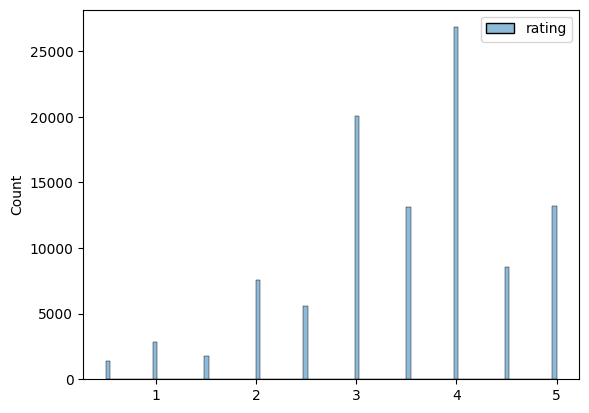

In [123]:
# Univariate analysis of Categorical variables
sns.histplot(df4[["rating"]])
# Maximum rating given is 4

In [124]:
df4.sort_values("userId")

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12117,1,2389,2.0,Psycho (1998),Crime|Horror|Thriller
12126,1,2395,5.0,Rushmore (1998),Comedy|Drama
12182,1,2406,4.0,Romancing the Stone (1984),Action|Adventure|Comedy|Romance
776,1,70,3.0,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
...,...,...,...,...,...
84152,610,51709,5.0,"Host, The (Gwoemul) (2006)",Comedy|Drama|Horror|Sci-Fi|Thriller
26937,610,589,5.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi
69808,610,66097,4.0,Coraline (2009),Animation|Fantasy|Thriller
69820,610,71464,4.0,"Serious Man, A (2009)",Comedy|Drama


In [125]:
df4.duplicated().sum()

0

In [126]:
# Creating PIvot table

In [127]:
df4_movies= df4.pivot_table(index='userId',columns = 'title',values = 'rating', aggfunc="mean")


In [128]:
df4_movies

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [129]:
# Fill nan values with 0

df4_movies.fillna(0,inplace=True)

In [130]:
df4_movies

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


In [131]:
#Calculating Cosing Based Similarity

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation 


In [132]:
df4_movies_sm = 1 - pairwise_distances(df4_movies.values, metric = 'cosine')

In [133]:
df4_movies_sm


array([[1.        , 0.02728287, 0.05972026, ..., 0.29109737, 0.09357193,
        0.14532081],
       [0.02728287, 1.        , 0.        , ..., 0.04621095, 0.0275654 ,
        0.10242675],
       [0.05972026, 0.        , 1.        , ..., 0.02112846, 0.        ,
        0.03211875],
       ...,
       [0.29109737, 0.04621095, 0.02112846, ..., 1.        , 0.12199271,
        0.32205486],
       [0.09357193, 0.0275654 , 0.        , ..., 0.12199271, 1.        ,
        0.05322546],
       [0.14532081, 0.10242675, 0.03211875, ..., 0.32205486, 0.05322546,
        1.        ]])

In [134]:
df4_df = pd.DataFrame(df4_movies_sm)
df4_df

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
1,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
2,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
3,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
4,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,1.000000,0.153063,0.262558,0.069622,0.201104
606,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,1.000000,0.283081,0.149190,0.139114
607,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,1.000000,0.121993,0.322055
608,0.093572,0.027565,0.000000,0.032198,0.261232,0.214234,0.090840,0.423993,0.000000,0.021766,...,0.035653,0.335231,0.061941,0.236601,0.097610,0.069622,0.149190,0.121993,1.000000,0.053225


In [56]:
df4_df.index = df4.userId.unique()
df4_df.columns = df4.userId.unique()

In [57]:
df4_df

,1,5,7,15,17,18,19,21,27,31,...,333,127,184,496,306,506,397,556,175,578
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
5,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
7,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
15,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
17,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,1.000000,0.153063,0.262558,0.069622,0.201104
397,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,1.000000,0.283081,0.149190,0.139114
556,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,1.000000,0.121993,0.322055
175,0.093572,0.027565,0.000000,0.032198,0.261232,0.214234,0.090840,0.423993,0.000000,0.021766,...,0.035653,0.335231,0.061941,0.236601,0.097610,0.069622,0.149190,0.121993,1.000000,0.053225


In [60]:
# Replacing diagonal values for same pair as 0
import numpy as np
np.fill_diagonal(df4_movies, 0)


In [61]:
df4_df.iloc[0:10,0:10]

,1,5,7,15,17,18,19,21,27,31
1,0.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875
5,0.027283,0.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445
7,0.059720,0.000000,0.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000
15,0.194395,0.003726,0.002251,0.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163
17,0.129080,0.016614,0.005020,0.128659,0.000000,0.300349,0.108342,0.429075,0.000000,0.030611
18,0.128152,0.025333,0.003936,0.088491,0.300349,0.000000,0.075843,0.370488,0.013904,0.020385
19,0.158744,0.027585,0.000000,0.115120,0.108342,0.075843,0.000000,0.114885,0.099463,0.132099
21,0.136968,0.027257,0.004941,0.062969,0.429075,0.370488,0.114885,0.000000,0.000000,0.023914
27,0.064263,0.000000,0.000000,0.011361,0.000000,0.013904,0.099463,0.000000,0.000000,0.040959
31,0.016875,0.067445,0.000000,0.031163,0.030611,0.020385,0.132099,0.023914,0.040959,0.000000


In [99]:
# Getting the maximum affinity pairs
max_values = df4_df.max(axis=1)
max_columns = df4_df.idxmax(axis=1)

# Create a new DataFrame to store the results
result_df = pd.DataFrame({'userId':df4.userId.unique(),'SimilarUserId': max_columns,'Max Value': max_values})
result_df.reset_index(inplace=True, drop=True)

result_df.head(20)

,userId,SimilarUserId,Max Value
0,1,532,0.357408
1,5,296,0.300074
2,7,346,0.078187
3,15,593,0.317541
4,17,520,0.520671
5,18,323,0.570296
6,19,28,0.357103
7,21,435,0.688842
8,27,526,0.209600
9,31,460,0.288265


In [100]:
# Maximum similarity probability
df4_df.loc[df4_df[7].idxmax()].sort_values(ascending=False).head(1)

252    0.425123
Name: 346, dtype: float64

In [66]:
# Checking for few example of recommended pairs

df4[(df4['userId']==5) | (df4['userId']==296)].sort_values("userId")


,userId,movieId,rating,title,genres
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
19335,5,247,5.0,Heavenly Creatures (1994),Crime|Drama
19356,5,265,3.0,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance
19525,5,357,2.0,Four Weddings and a Funeral (1994),Comedy|Romance
19722,5,475,5.0,In the Name of the Father (1993),Drama
...,...,...,...,...,...
1974,296,296,4.5,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
965,296,110,5.0,Braveheart (1995),Action|Drama|War
669,296,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
24491,296,4144,5.0,In the Mood For Love (Fa yeung nin wa) (2000),Drama|Romance


In [67]:
df4[(df4['userId']==21) | (df4['userId']==435)].sort_values("userId")

,userId,movieId,rating,title,genres
7,21,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
66924,21,7570,4.5,Octopussy (1983),Action|Adventure|Thriller
66912,21,7569,4.5,You Only Live Twice (1967),Action|Adventure|Sci-Fi|Thriller
66885,21,6503,3.5,Charlie's Angels: Full Throttle (2003),Action|Adventure|Comedy|Crime|Thriller
66880,21,5796,2.0,Casino Royale (1967),Action|Adventure|Comedy
...,...,...,...,...,...
40163,435,2023,5.0,"Godfather: Part III, The (1990)",Crime|Drama|Mystery|Thriller
28801,435,158,4.0,Casper (1995),Adventure|Children
46714,435,7438,5.0,Kill Bill: Vol. 2 (2004),Action|Drama|Thriller
17171,435,58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX


In [68]:
#Viewing titles of userid 21 and userid 435
df4[df4["userId"]==21].title

7                                 Toy Story (1995)
1576     Star Wars: Episode IV - A New Hope (1977)
1830                           Pulp Fiction (1994)
2438                           Forrest Gump (1994)
2796                              Mask, The (1994)
                           ...                    
68900                            La La Land (2016)
68909                Office Christmas Party (2016)
68912                                  Sing (2016)
68916                John Wick: Chapter Two (2017)
68923               The Gracefield Incident (2015)
Name: title, Length: 443, dtype: object

In [69]:
df4[df4["userId"]==435].title

725                             Usual Suspects, The (1995)
1195                                      Desperado (1995)
1244                                  Billy Madison (1995)
2301                                      Tommy Boy (1995)
10161                             Starship Troopers (1997)
12052                            Enemy of the State (1998)
14478                                    Fight Club (1999)
15781                                     Gladiator (2000)
16528                     Shawshank Redemption, The (1994)
16853                             Kill Bill: Vol. 1 (2003)
17031                                 Departed, The (2006)
17171                              Dark Knight, The (2008)
17428                                Shutter Island (2010)
17563                                     Inception (2010)
23029                                Eyes Wide Shut (1999)
28801                                        Casper (1995)
32391                              Last Action Hero (199

 ## Creating Function to suggest recommended movies based on input of a movie title ##

In [158]:
df4_movies_T= df4.pivot_table(index='movieId',columns = 'userId',values = 'rating', aggfunc="mean")
df4_movies_T.fillna(0,inplace=True)
df4_movies_T.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
df4.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [159]:
from sklearn.metrics.pairwise import cosine_similarity
movie_similarity = cosine_similarity(df4_movies_T)

In [160]:
movie_similarity

array([[1.        , 0.41056206, 0.2969169 , ..., 0.        , 0.        ,
        0.        ],
       [0.41056206, 1.        , 0.28243799, ..., 0.        , 0.        ,
        0.        ],
       [0.2969169 , 0.28243799, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [219]:

# Function to get movie recommendations based on a given movie title
def get_movie_recommendations(movie_title, top_n=10):
    # Find the movieId corresponding to the given title
    movie_id = df4[df4['title'] == movie_title]['movieId'].values[0]

    # Get the movie ratings for the given movie
    

    # Calculate the weighted sum of ratings for similar movies
    weighted_ratings = movie_similarity.dot(df4_movies_T)

    # Sort by weighted ratings in descending order
    recommended_movie_ids = weighted_ratings.argsort()[::-1]

    # Exclude the input movie itself (if it exists in the recommendations)
    if movie_id in recommended_movie_ids:
        recommended_movie_ids = recommended_movie_ids[1:]

    # Get the top N recommended movie titles
    top_recommendations = [df4[df4['movieId'] == movie_id]['title'].values[0] for movie_id in recommended_movie_ids[:top_n]]

    return top_recommendations




## Tried the above function but it is not working, please suggest further ##

In [220]:
# Example usage: Get movie recommendations for a movie title (replace with your desired movie title)
input_movie_title = 'Octopussy (1983)'
recommended_movies = get_movie_recommendations(input_movie_title)

print(f"Recommended Movies for '{input_movie_title}':")
for idx, movie_title in enumerate(recommended_movies, 1):
    print(f"{idx}. {movie_title}")

ValueError: ('Lengths must match to compare', (100836,), (610,))